<center>
<img src="resources/kfupm.png" width="20%">
</center>

---

<br>
<center>
    <h1>Quantum Dynamic Circuits</h1>
    <h2>IBM Quantum Spring Challenge 2023</h2>
</center>
<br>
<br>

---

<p style="text-align: center; font-size: 18px;">By: Ahmed Almalki</p>

## What is IBM Quantum Challenge
---
**The IBM Quantum Challenge** is a free `online event` that introduces quantum computing to learners. It features themed exercises on real quantum hardware and is open to all, regardless of experience.

**The Challenge** is divided into four levels of ascending difficulty: `Explorer`, `Adventurer`, `Pioneer`, and `Master`. Each level consists of a series of exercises that introduce participants to different aspects of quantum computing. The exercises are designed to be challenging, but also fun and engaging.

### The benefits of IBM Quantum Challenge:
- Work on `challenging exercises` that will help you develop your skills.
- Connect with other learners and experts in `the quantum community`.
- Get a glimpse of `the future of computing`.

# IBM Quantum Challenge 2023
---

This year’s challenge focued on **`dynamic circuits`**, a technology that makes it easier to run more-advanced quantum algorithms. This event featured 5 Labs, each with exercises and tutorial content to get you started using Dynamic Circuits.
## Challenge content
- **Lab 1:** Intro to Dynamic Circuits
- **Lab 2:** Quantum Teleportation
- **Lab 3:** Iterative Phase Estimation
- **Lab 4:** Quantum Error Correction
- **Lab 5:** Using a 127-qubit System

# Intro to Dynamic Circuits
---

**Dynamic circuits** are quantum circuits with mid-circuit measurements, enabling classical feedforward.

**IBM Quantum hardware** recently added support for mid-circuit measurements and reset, but enabling classical feedforward required a substantial redesign of the control systems and software stack. Full support for dynamic circuits was introduced in `2022`.

<center>
<img src="resources/sketch-1.png" width="50%">
</center>

In [178]:
from qiskit_aer import AerSimulator
from qiskit.visualization import *

def simulate_circuit(qc):
    backend_sim = AerSimulator()
    reset_sim_job = backend_sim.run(qc)
    reset_sim_result = reset_sim_job.result()
    return reset_sim_result.get_counts()

def draw_circuit_and_print_output(qc):
    fig, axs = plt.subplots(1, 2, width_ratios=[.7, .3], figsize=(15, 4))
    fig.subplots_adjust(wspace=0.5)
    circuit_drawer(qc, ax=axs[0], output='mpl')
    axs[1].text(0.5, 0.5, output_text(qc), fontsize=18, ha='center', va='center')
    axs[1].axis('off')
#     plot_histogram(counts_sim, ax=axs[1])
    plt.show()
    
def output_text(qc):
    text = ''
    numbers = [1, 2, 3, 4, 5]
    ordinals = {1: "1st", 2: "2nd", 3: "3rd"}

    for num in numbers:
        ordinal = ordinals.get(num, str(num) + "th")
        text += f"{ordinal} round: {simulate_circuit(qc)}\n"
    return text
    

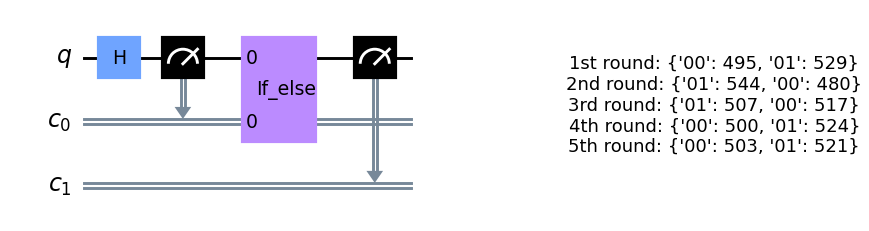

In [182]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.measure(qr[0], cr[0])

with qc.if_test((cr[0], 1)):
    qc.x(qr[0])
    
qc.measure(qr[0], cr[1])

# qc.draw(output="mpl")
draw_circuit_and_print_output(qc)

---
The first bit is sometimes `0` and sometimes `1`, but the second bit is always `0`. 

_(recall that Qiskit uses little-endian bit-ordering, so that the right-most bit is the first bit and the left-most bit is the last bit)._

# Quantum Teleportation
---

**Quantum teleportation** is a protocol that allows the transfer of quantum information from one qubit to another using entanglement and classical communication. It was proposed in `1993`. 

**The process** does not transmit the qubit itself but rather transfers the quantum state from the source qubit to the target qubit.

In [290]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit
import math

def initialize_circuit():
    return QuantumCircuit(qr, cr)

def create_bell_pair(qc, qr, cr):
    """Creates a bell pair between qubits a and b."""
    _, a, b = qr

    ####### your code goes here #######
    qc.h(a)
    qc.cx(a, b)

    return qc

def alice_gates(qc, qr, cr):
    """Creates Alices's gates"""
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    ####### your code goes here #######
    qc.cx(s, a)
    qc.h(s)

    return qc

def measure_and_send(qc, qr, cr):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    qc.measure(a, c0)
    qc.measure(s, c1)

    return qc

def bob_gates(qc, qr, cr):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    with qc.if_test((c1, 1)):
        qc.z(b)
    with qc.if_test((c0, 1)):
        qc.x(b)
        
    qc.measure(b, c2)

    return qc

In [291]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")

bell_pair_circuit = create_bell_pair(initialize_circuit(), qr, cr)
alice_gates_circuit = alice_gates(initialize_circuit(), qr, cr)
measure_circuit = measure_and_send(initialize_circuit(), qr, cr)
bob_gates_circuit = bob_gates(initialize_circuit(), qr, cr)

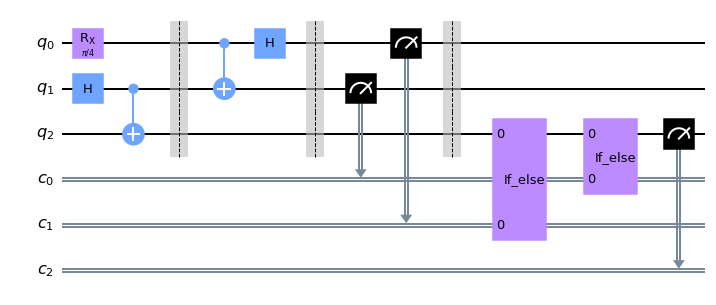

In [292]:
initial_state = initialize_circuit()
initial_state.rx(math.pi/4, 0)

teleportation_circuit = (
    initial_state.compose(bell_pair_circuit)
    .compose(alice_gates_circuit)
    .compose(measure_circuit)
    .compose(bob_gates_circuit)
)

teleportation_circuit.draw(output="mpl")

# Output
---

<center>
<img src="resources/lab2_p1.png" width="50%">
</center>

# Iterative Phase Estimation
---

**Quantum phase estimation (QPE)** is a crucial algorithm used in Shor's factoring algorithm and quantum simulation. However, the textbook version with auxiliary qubits is challenging to execute on current noisy devices. 

**Iterative phase estimation (IPE)** is a variant that only needs one auxiliary qubit and was previously impossible to execute on IBM's hardware until `dynamic circuits` were introduced.

# Iterative Phase Estimation
---

We will perform IPE on the single-qubit $S$-gate. The $S$ gate is given by the matrix

$$ S =
\begin{pmatrix}
1 & 0\\
0 & e^{i\pi / 2}
\end{pmatrix}$$

We will use the eigenstate $|\Psi\rangle = |1\rangle$, which has eigenvalue $e^{i\pi / 2}= e^{i2\pi \cdot 1/4}$. So we have $\varphi = 1/4 = 0.01 = 0.\varphi_1 \varphi_2$. Since $\varphi$ can be represented exactly with 2 bits, our quantum circuit implementation will use a classical register with two bits to store the result.

- **Step 1:** We measure the least significant bit of $\varphi_2$.
- **Step 2:** We extract the next bit $\varphi_1$, which will involve applying a phase correction to cancel out the phase contribution from $\varphi_2$. 


In [293]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np
import math

def create_step_1_circuit(qc, qr, cr):
    ####### your code goes here #######
    qr0, qr1 = qr
    cr0, cr1 = cr
    qc.h(qr0)
    qc.x(qr1)
    qc.cp(math.pi, qr0, qr1)
    qc.h(0)
    qc.measure(qr0, cr0)

    return qc

def create_step_2_circuit(qc, qr, cr):
    ####### your code goes here #######
    qc.barrier()  # Use barrier to separate steps
    qr0, qr1 = qr
    cr0, cr1 = cr
    qc.reset(qr0)
    qc.h(qr0)
    
    with qc.if_test((cr0, 1)):
        qc.p(-math.pi/2, qr0)
        
    qc.cp(math.pi/2, qr0, qr1)
    qc.h(qr0)
    qc.measure(qr0, cr1) 
    
    return qc

In [294]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")

step_1_circuit = create_step_1_circuit(initialize_circuit(), qr, cr)
step_2_circuit = create_step_2_circuit(initialize_circuit(), qr, cr)

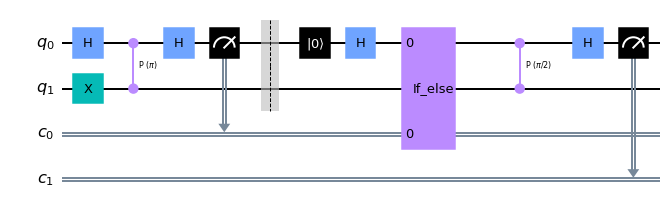

In [295]:
initial_state = initialize_circuit()

IPE_circuit = (
    initial_state.compose(step_1_circuit)
    .compose(step_2_circuit)
)

IPE_circuit.draw(output="mpl")

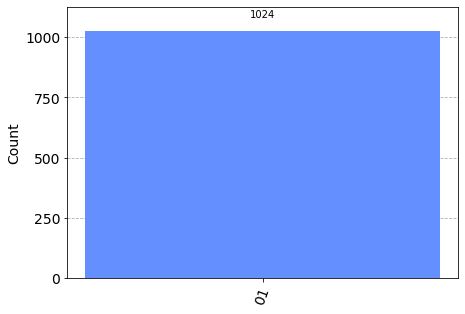

In [296]:
plot_histogram(simulate_circuit(IPE_circuit))

---
We have gotten the bitstring `01` with 100% probability. This value corresponds to the phase written in binary as $\varphi = 0.01 = 1/4$.

# Quantum Error Correction
---

**Error correction** is vital in quantum computing to address the inevitable errors caused by noise, ensuring accurate results by correcting them as they arise.

**Dynamic circuits** can greatly aid quantum computers in error correction by mitigating noise and ensuring accurate results.

# Quantum Error Correction
---

Let’s prepare everything such that we can start with implementing the error correction.

- **Initializing the Qubit:** Prepare the physical state $|\Psi_1\rangle = |1\rangle$
- **Encoding the Qubit:** Map our state $|\Psi_1\rangle = (\alpha |0\rangle + \beta |1\rangle)$ using our encoding $U_{en}|\Psi_0\rangle$ to the state $ (\alpha |000\rangle + \beta |111\rangle)$.
- **Measuring Stabilizers:** Compute syndrome bits, such that they can be measured to detect single bitflip errors.
    - `00` -> No error occurred 
    - `01` -> An error occurred  in qubit 0 (the first qubit)
    - `10` -> An error occurred  in qubit 1 (the second qubit)
    - `11` -> An error occurred  in qubit 2 (the third qubit)
- **Correcting Errors:** Correct the errors according to the measured syndromes.
- **Decoding Circuit:** Use our decoding $U_{de}|\Psi_0\rangle$ which maps $ (\alpha |000\rangle + \beta |111\rangle)$ to   $|\Psi_1\rangle = (\alpha |0\rangle + \beta |1\rangle)$. _Hint:_ $U_{de} = U_{en}^\dagger$

In [297]:
# Initializing
def initialize_circuit():
    return QuantumCircuit(encoding, stabilizer, results, syndrome)

# Encoding using bit flip code
def encode_bit_flip(qc, state, ancillas):
    qc.barrier(state, *ancillas)
    for ancilla in ancillas:
        qc.cx(state, ancilla)
    return qc

# Decoding (doing the reverse)
def decode_bit_flip(qc, state, ancillas):
    qc.barrier(state, *ancillas)
    for ancilla in ancillas:
        qc.cx(state, ancilla)
    return qc

def measure_syndrome_bit(qc, encoding, stabilizer):
    qc.barrier()
    encoding_q0, encoding_q1, encoding_q2 = encoding
    stabilizer_q0, stabilizer_q1 = stabilizer

    ####### your code goes here #######
    qc.ccx(encoding_q0, encoding_q1, stabilizer_q0)
    qc.ccx(encoding_q1, encoding_q2, stabilizer_q0)
    qc.ccx(encoding_q0, encoding_q1, stabilizer_q1)
    qc.ccx(encoding_q0, encoding_q2, stabilizer_q1)

#     ####### don't edit the code below #######
    qc.barrier()
    qc.measure(stabilizer, syndrome)
#     with qc.if_test((syndrome_b0, 1)):
#         qc.x(stabilizer_q0)
#     with qc.if_test((syndrome_b1, 1)):
#         qc.x(stabilizer_q1)

    return qc

# Correct the errors, remember how we encoded the errors above!
def apply_correction_bit(qc, encoding, syndrome):
    qc.barrier()
    encoding_q0, encoding_q1, encoding_q2 = encoding

    ####### your code goes here #######
    with qc.if_test((syndrome_b0, 1)):
        with qc.if_test((syndrome_b1, 0)):
            qc.x(encoding_q0)
    with qc.if_test((syndrome_b0, 0)):
        with qc.if_test((syndrome_b1, 1)):
            qc.x(encoding_q1)
    with qc.if_test((syndrome_b0, 1)):
        with qc.if_test((syndrome_b1, 1)):
            qc.x(encoding_q2)
    
    return qc

def apply_final_readout(qc, encoding, results):
    qc.barrier(encoding)
    qc.measure(encoding, results)
    return qc

def make_some_noise(qc, encoding, syndrome, error_percentage):
    encoding_q0, encoding_q1, encoding_q2 = encoding
    syndrome_b0, syndrome_b1 = syndrome

    ####### your code goes here #######
    qc.barrier(encoding)
    err_perc = 0.1
    theta = 2 * math.asin(math.sqrt(err_perc))
    qc.rx(theta, encoding_q0)
    qc.rx(theta, encoding_q1)
    qc.rx(theta, encoding_q2)

    return qc

In [298]:
# Setup a base quantum circuit for our experiments
encoding = QuantumRegister(3, 'encoding')
stabilizer = QuantumRegister(2, 'stabilizer')

encoding_q0, encoding_q1, encoding_q2 = encoding
stabilizer_q0, stabilizer_q1 = stabilizer

# Results of the encoding
results = ClassicalRegister(3, 'result')

result_b0, result_b1, result_b2 = results

# For measuring the stabilizer
syndrome = ClassicalRegister(2, 'syndrome')

syndrome_b0, syndrome_b1 = syndrome

# The actual qubit which is encoded
state = encoding[0]

# The ancillas used for encoding the state
ancillas = encoding[1:]

encoding_circuit = encode_bit_flip(initialize_circuit(), state, ancillas)
syndrome_circuit = measure_syndrome_bit(initialize_circuit(), encoding, stabilizer)
correction_circuit = apply_correction_bit(initialize_circuit(), encoding, syndrome)
decoding_circuit = decode_bit_flip(initialize_circuit(), state, ancillas)
measuring_circuit = apply_final_readout(initialize_circuit(), encoding, results)

noise_circuit = make_some_noise(initialize_circuit(), encoding, syndrome, 10)

In [302]:
initial_state = initialize_circuit()
initial_state.x(encoding[0])

complete_circuit = (
    initial_state.compose(encoding_circuit)
    .compose(noise_circuit) # generating noise 10%
    .compose(syndrome_circuit)
    .compose(correction_circuit)
    .compose(decoding_circuit)
    .compose(measuring_circuit)
)
# complete_circuit.draw(output="mpl")

<center>
    <img src="resources/lab4_1.png" width="100%">
</center>

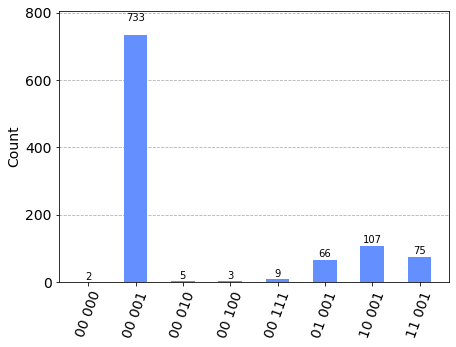

In [303]:
from qiskit import Aer

backend = Aer.get_backend("qasm_simulator")
counts = backend.run(complete_circuit, shots=1000).result().get_counts()
plot_histogram(counts)

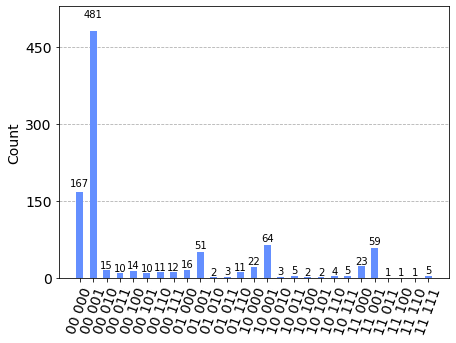

In [301]:
from qiskit.providers.fake_provider import FakeManilaV2

backend = FakeManilaV2()
counts = backend.run(complete_circuit, shots=1000).result().get_counts()
plot_histogram(counts)

# Using a 127-qubit System
---

It was a reward to use one of **`IBM Quantum 127 qubit devices`**

<br>
<center>
    <img src="resources/ibm_sherbrooke.png" width="40%">
</center>

<center>
    <img src="resources/thank-you.png" width="70%">
</center>

In [315]:
!jupyter nbconvert 'Presentation.ipynb' --to slides --post serve

[NbConvertApp] Converting notebook Presentation.ipynb to slides
[NbConvertApp] Writing 385681 bytes to Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Presentation.slides.html
Use Control-C to stop this server
^C

Interrupted
